In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [36]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [37]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [39]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1a23d3a37e7ddea421b08fd0d9d8241


In [41]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities[:30]):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kasongo-lunda
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | hofn
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | asosa
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | mehamn
Processing Record 13 of Set 1 | toliary
City not found. Skipping...
Processing Record 14 of Set 1 | balykshi
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | kuryk
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | bloomsburg
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | provideniya
Processing R

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kasongo-Lunda,-6.4667,16.8167,76.93,81,100,2.89,CD,2021-04-01 13:27:27
1,Hithadhoo,-0.6000,73.0833,84.06,76,100,17.43,MV,2021-04-01 13:27:27
2,Hofn,64.2539,-15.2082,51.80,43,0,23.02,IS,2021-04-01 13:27:28
3,Busselton,-33.6500,115.3333,68.00,79,95,7.94,AU,2021-04-01 13:27:28
4,Kaitangata,-46.2817,169.8464,62.01,50,100,7.00,NZ,2021-04-01 13:27:28
5,Ushuaia,-54.8000,-68.3000,46.40,76,0,4.61,AR,2021-04-01 13:27:28
6,Cayenne,4.9333,-52.3333,84.20,70,75,13.80,GF,2021-04-01 13:27:29
7,Jamestown,42.0970,-79.2353,28.99,86,90,10.36,US,2021-04-01 13:27:30
8,Ancud,-41.8697,-73.8203,55.99,94,90,3.44,CL,2021-04-01 13:27:30
9,Asosa,10.0667,34.5333,85.87,20,47,4.63,ET,2021-04-01 13:27:30


In [45]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kasongo-Lunda,CD,2021-04-01 13:27:27,-6.4667,16.8167,76.93,81,100,2.89
1,Hithadhoo,MV,2021-04-01 13:27:27,-0.6000,73.0833,84.06,76,100,17.43
2,Hofn,IS,2021-04-01 13:27:28,64.2539,-15.2082,51.80,43,0,23.02
3,Busselton,AU,2021-04-01 13:27:28,-33.6500,115.3333,68.00,79,95,7.94
4,Kaitangata,NZ,2021-04-01 13:27:28,-46.2817,169.8464,62.01,50,100,7.00
5,Ushuaia,AR,2021-04-01 13:27:28,-54.8000,-68.3000,46.40,76,0,4.61
6,Cayenne,GF,2021-04-01 13:27:29,4.9333,-52.3333,84.20,70,75,13.80
7,Jamestown,US,2021-04-01 13:27:30,42.0970,-79.2353,28.99,86,90,10.36
8,Ancud,CL,2021-04-01 13:27:30,-41.8697,-73.8203,55.99,94,90,3.44
9,Asosa,ET,2021-04-01 13:27:30,10.0667,34.5333,85.87,20,47,4.63


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

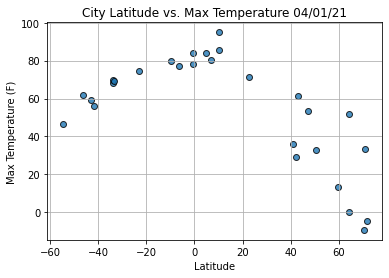

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

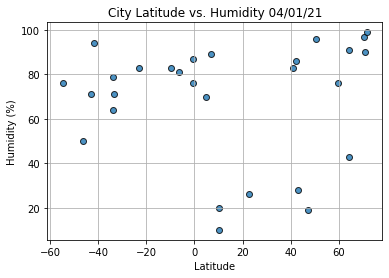

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

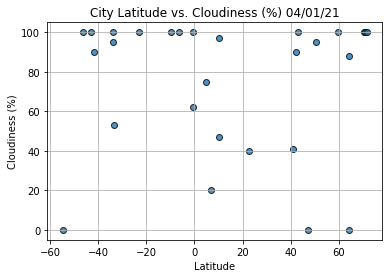

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

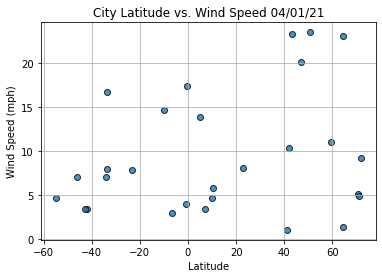

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2021-04-01 13:27:32
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    78.01
Humidity                       87
Cloudiness                     62
Wind Speed                      4
Name: 13, dtype: object

In [63]:
city_data_df["Lat"] >= 0

0     False
1     False
2      True
3     False
4     False
5     False
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13    False
14     True
15    False
16    False
17    False
18     True
19    False
20     True
21    False
22     True
23     True
24     True
25     True
26     True
27     True
Name: Lat, dtype: bool

In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hofn,IS,2021-04-01 13:27:28,64.2539,-15.2082,51.80,43,0,23.02
6,Cayenne,GF,2021-04-01 13:27:29,4.9333,-52.3333,84.20,70,75,13.80
7,Jamestown,US,2021-04-01 13:27:30,42.0970,-79.2353,28.99,86,90,10.36
9,Asosa,ET,2021-04-01 13:27:30,10.0667,34.5333,85.87,20,47,4.63
10,Chokurdakh,RU,2021-04-01 13:27:31,70.6333,147.9167,-9.38,97,100,5.10
11,Mehamn,NO,2021-04-01 13:27:31,71.0357,27.8492,33.17,90,100,4.90
12,Balykshi,KZ,2021-04-01 13:27:31,47.0667,51.8667,53.60,19,0,20.13
14,Kuryk,KZ,2021-04-01 13:27:32,43.2000,51.6500,61.34,28,100,23.26
18,Bloomsburg,US,2021-04-01 13:27:33,41.0037,-76.4549,36.00,83,41,1.01
20,Provideniya,RU,2021-04-01 13:27:34,64.3833,-173.3000,-0.11,91,88,1.36


In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hofn,IS,2021-04-01 13:27:28,64.2539,-15.2082,51.80,43,0,23.02
6,Cayenne,GF,2021-04-01 13:27:29,4.9333,-52.3333,84.20,70,75,13.80
7,Jamestown,US,2021-04-01 13:27:30,42.0970,-79.2353,28.99,86,90,10.36
9,Asosa,ET,2021-04-01 13:27:30,10.0667,34.5333,85.87,20,47,4.63
10,Chokurdakh,RU,2021-04-01 13:27:31,70.6333,147.9167,-9.38,97,100,5.10


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

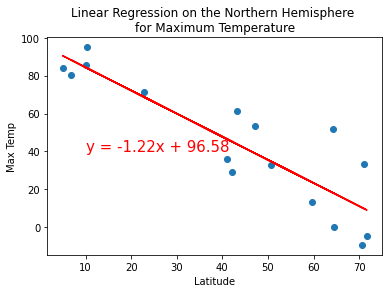

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", 'Max Temp',(10,40))

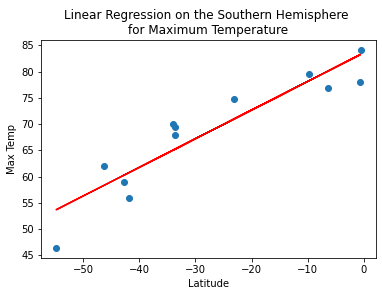

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

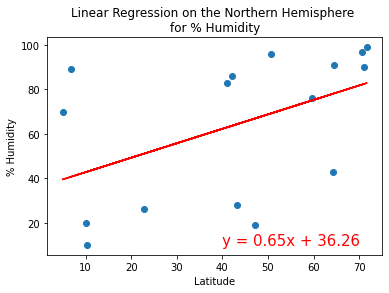

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

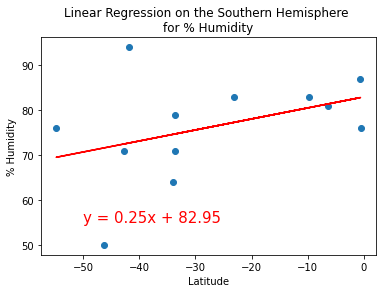

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,55))

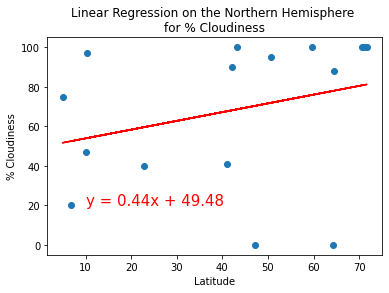

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,20))

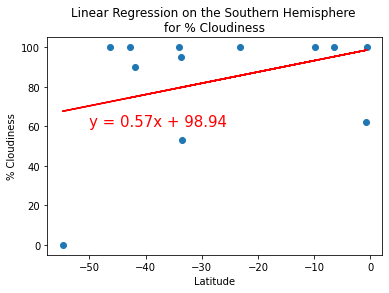

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Cloudiness", "% Cloudiness",(-50,60))

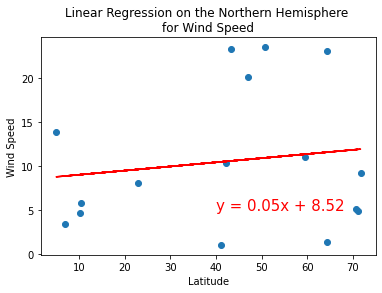

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,5))

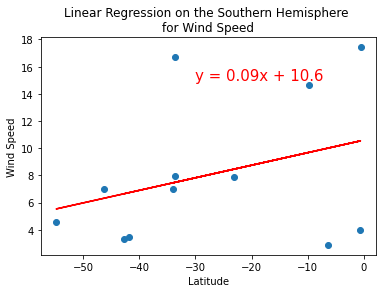

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-30,15))